In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns 

In [2]:
# Load all the data
reviews = pd.read_csv('datasets/reviews.csv')
breweries = pd.read_csv('datasets/breweries.csv')
beers = pd.read_csv('datasets/beers.csv')

aromas = pd.read_csv('datasets/beer_data_set.csv')

In [3]:
reviews.head(3)

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75


In [4]:
breweries.head(3)

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"


In [5]:
aromas.head(3)

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62


In [6]:
beers.head(3)

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t


In [7]:
merged_beers = pd.merge(beers, breweries, how='inner', left_on='brewery_id', right_on='id', suffixes=('_beer', '_brewery'))
print("merged_beers shape: ", merged_beers.shape)
merged_beers.head(3)

merged_beers shape:  (358873, 17)


,id_beer,name_beer,brewery_id,state_beer,country_beer,style,availability,abv,notes_beer,retired,id_brewery,name_brewery,city,state_brewery,country_brewery,notes_brewery,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
1,8677,Red Leaf Strong Ale,2199,CA,US,American Strong Ale,Year-round,8.6,No notes at this time.,f,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
2,8129,Hefeweisen,2199,CA,US,German Hefeweizen,Year-round,NaN,No notes at this time.,t,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"


In [8]:
merged_aromas = pd.merge(merged_beers, aromas, how='inner' ,left_on='name_beer', right_on='Name')

# Only keep rows where merged_aromas is equal to Brewery
merged_aromas = merged_aromas[merged_aromas['Brewery'] == merged_aromas['name_brewery']]

print("merged_aromas shape: ", merged_aromas.shape)

# Petit sanity check
merged_aromas[['name_brewery', 'Brewery', 'name_beer', 'Name']].head(3)

merged_aromas shape:  (4368, 38)


,name_brewery,Brewery,name_beer,Name
14,Rogue Ales,Rogue Ales,Mocha Porter,Mocha Porter
1024,Stone Brewing,Stone Brewing,Saison,Saison
1705,Black Market Brewing Co.,Black Market Brewing Co.,Rye IPA,Rye IPA


In [9]:
merged_aromas = merged_aromas.drop(['Brewery', 'Name', 'id_brewery', 'state_beer', 'country_beer'], axis=1)\
    .rename(columns={'state_brewery': 'state', 'country_brewery': 'country', 'id_beer': 'beer_id'})
merged_aromas.head(3)

,beer_id,name_beer,brewery_id,style,availability,abv,notes_beer,retired,name_brewery,city,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
14,353,Mocha Porter,132,American Porter,Year-round,5.6,No notes at this time.,f,Rogue Ales,Newport,...,93,16,113,65,7,0,7,44,11,145
1024,118062,Saison,147,Belgian Saison,Rotating,6.0,A modern take on a Belgian classic,f,Stone Brewing,Escondido,...,30,15,26,14,58,1,62,73,52,24
1705,65468,Rye IPA,17281,Rye Beer,Year-round,7.5,No notes at this time.,f,Black Market Brewing Co.,Temecula,...,31,7,67,27,46,0,57,89,18,75


In [10]:
merged_reviews = pd.merge(reviews, merged_aromas, how='inner', on='beer_id')
print("merged_reviews shape: ", merged_reviews.shape)

merged_reviews shape:  (3194604, 42)


In [11]:
# merge similar beer styles together in a meta_style column

from utils.beer_metastyles import metastyle_beer_dict

# Create a new column for meta_style
merged_aromas['meta_style'] = merged_aromas['style']

# Create a function to find the metastyle

def find_metastyle(specific_style):
    for metastyle, beer_substyles in metastyle_beer_dict.items():
        for beer_substyle_keyword in beer_substyles:
            if beer_substyle_keyword in specific_style:
                return metastyle
    
    return 'Other'

# Iterate through the styles to find the metastyle

merged_aromas['meta_style'] = merged_aromas['style'].apply(find_metastyle)

In [12]:
merged_reviews = pd.merge(reviews, merged_aromas, how='inner', on='beer_id')
print("merged_reviews shape: ", merged_reviews.shape)

merged_reviews shape:  (3194604, 43)


In [13]:
# print number of beers in each metastyle
merged_aromas['meta_style'].value_counts()

Ale               1182
Other              750
Lager              706
Stout              548
Sour               269
IPA                222
Belgian Blonde     219
Boozy              196
Ambree              86
Smoked Beer         84
Winter Beer         72
Alcohol-free        34
Name: meta_style, dtype: int64

In [16]:
merged_aromas.columns

Index(['beer_id', 'name_beer', 'brewery_id', 'style', 'availability', 'abv',
       'notes_beer', 'retired', 'name_brewery', 'city', 'state', 'country',
       'notes_brewery', 'types', 'key', 'Style', 'Style Key', 'Description',
       'ABV', 'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body',
       'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy',
       'Spices', 'Malty', 'meta_style'],
      dtype='object')

In [17]:
merged_reviews.columns

Index(['beer_id', 'username', 'date', 'text', 'look', 'smell', 'taste', 'feel',
       'overall', 'score', 'name_beer', 'brewery_id', 'style', 'availability',
       'abv', 'notes_beer', 'retired', 'name_brewery', 'city', 'state',
       'country', 'notes_brewery', 'types', 'key', 'Style', 'Style Key',
       'Description', 'ABV', 'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency',
       'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits',
       'Hoppy', 'Spices', 'Malty', 'meta_style', 'mean_rating'],
      dtype='object')

c:\Users\nicte\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

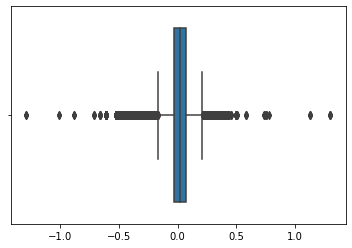

In [18]:
# for merged_reviews, calculate average rating for each beer
merged_reviews['mean_rating'] = merged_reviews.groupby('beer_id')['overall'].transform('mean')

# plot the difference between the average rating of merged_reviews and the review_overall of merged_aromas
sns.boxplot(merged_reviews['Ave Rating'] - merged_reviews['mean_rating'])

As we can see, the average rating diffenrence between the two datasets is pretty similar. And we can take both average beer ratings as a reference. This indicates the two sources are reliable as they provide similar results for the majority of beers

In [29]:
# display in a radar chart the aromatic profiles of each best rated 50 same meta_style beers, compared to 50 worse rated same meta_style beers.

nb_beers = 20

# get the best rated nb_beers beers in each meta_style
best_beers_per_style = merged_aromas.sort_values('Ave Rating', ascending=False).groupby('meta_style').head(nb_beers)
worse_beers_per_style = merged_aromas.sort_values('Ave Rating', ascending=True).groupby('meta_style').head(nb_beers)

aroma_columns =  ['Astringency', 'Body',
       'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy',
       'Spices', 'Malty']

# get the average aromatic profile of each meta_style
best_beers_per_style_mean = best_beers_per_style.groupby('meta_style').mean()[aroma_columns]
worse_beers_per_style_mean = worse_beers_per_style.groupby('meta_style').mean()[aroma_columns]

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

## Plots

### Is there a flavour difference between the best and worse rated beers for each metastyle ?

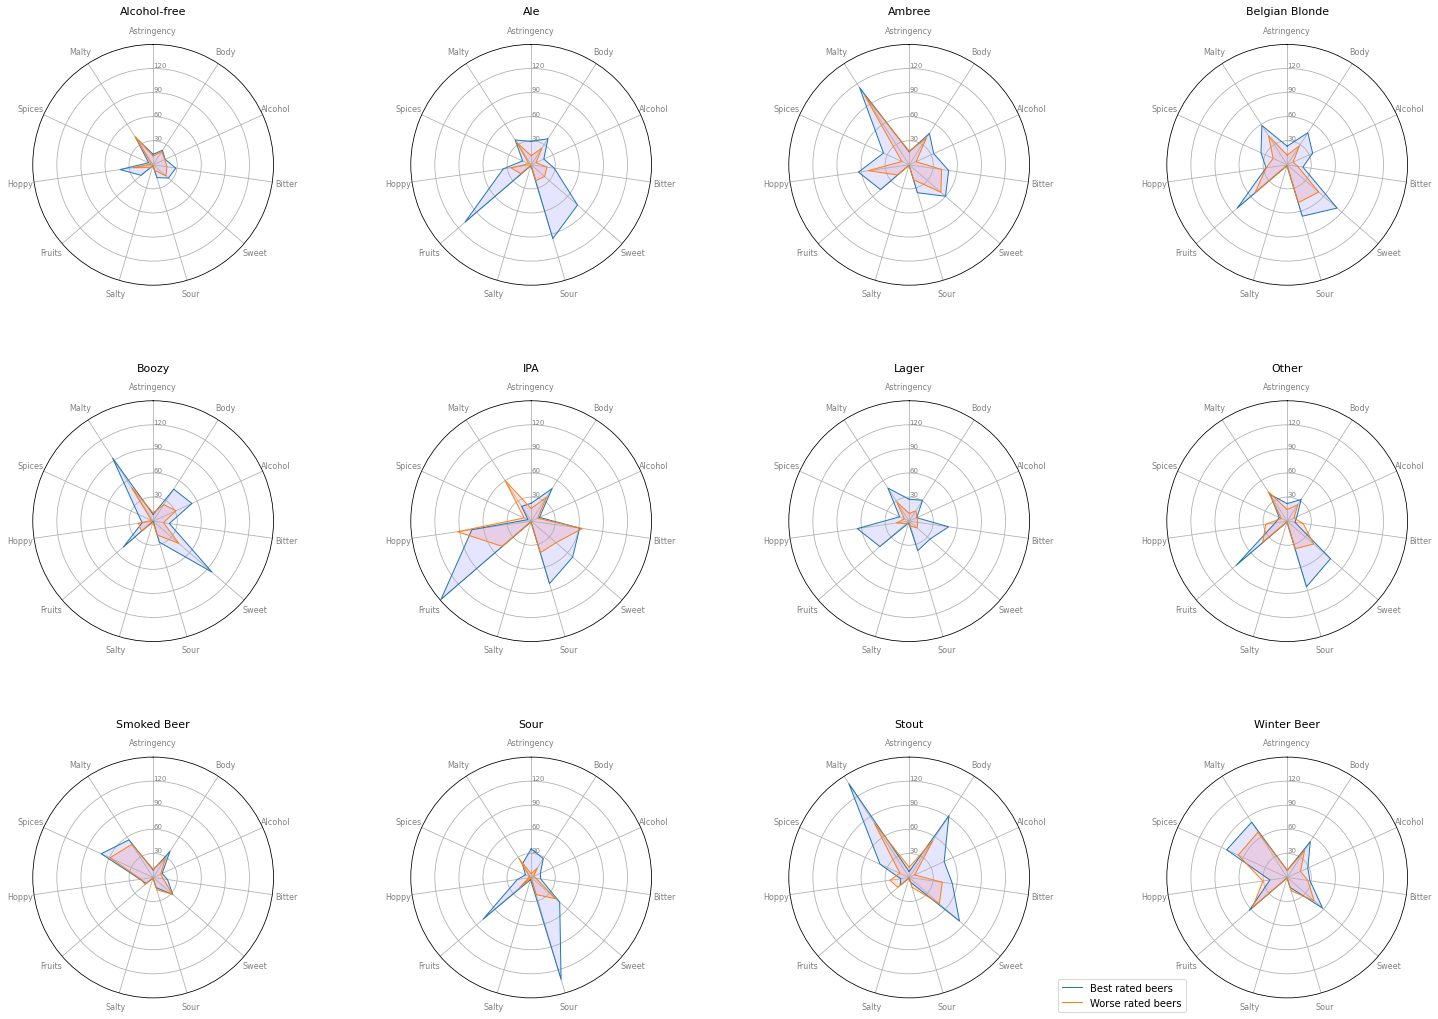

In [31]:
# plot on spider chart per style with the mean best and worse beer aromatic profile
nb_plot_columns = 4
nb_plot_rows = len(best_beers_per_style_mean.index) // nb_plot_columns + 1

fig, ax = plt.subplots(nb_plot_rows, nb_plot_columns, figsize=(20, 20))


for i, meta_style in enumerate(best_beers_per_style_mean.index):

    # ------- PART 1: Create background
    col = i % nb_plot_columns
    row = i // nb_plot_columns
    
    # number of variable
    categories=list(best_beers_per_style_mean)
    N = len(aroma_columns)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax[row, col] = plt.subplot(nb_plot_rows, nb_plot_columns, i+1, polar=True)

    # If you want the first axis to be on top:
    ax[row, col].set_theta_offset(np.pi / 2)
    ax[row, col].set_theta_direction(-1)
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    
    # Draw ylabels
    ax[row, col].set_rlabel_position(0)
    plt.yticks([30,60,90,120], ["30","60","90","120"], color="grey", size=7)
    plt.ylim(0,150)


    # ------- PART 2: Add plots
    
    # Plot each individual = each line of the data
    # I don't make a loop, because plotting more than 3 groups makes the chart unreadable
    
    # Ind1
    values=best_beers_per_style_mean.loc[meta_style].values.flatten().tolist()
    values += values[:1]
    ax[row, col].plot(angles, values, linewidth=1, linestyle='solid', label="Best rated beers")
    ax[row, col].fill(angles, values, 'b', alpha=0.1)

    # Ind2
    values=worse_beers_per_style_mean.loc[meta_style].values.flatten().tolist()
    values += values[:1]
    ax[row, col].plot(angles, values, linewidth=1, linestyle='solid', label="Worse rated beers")
    ax[row, col].fill(angles, values, 'r', alpha=0.1)

    # Add title and make background white
    ax[row, col].set_title(meta_style, size=11, y=1.1)
    ax[row, col].set_facecolor('white')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.tight_layout()

# Make background color white
fig.patch.set_facecolor('white')

# remove empty plots
for i in range(len(best_beers_per_style_mean.index), nb_plot_columns * nb_plot_rows):
    col = i % nb_plot_columns
    row = i // nb_plot_columns
    fig.delaxes(ax[row, col])

plt.show()

### Which country makes what type of beer best ?

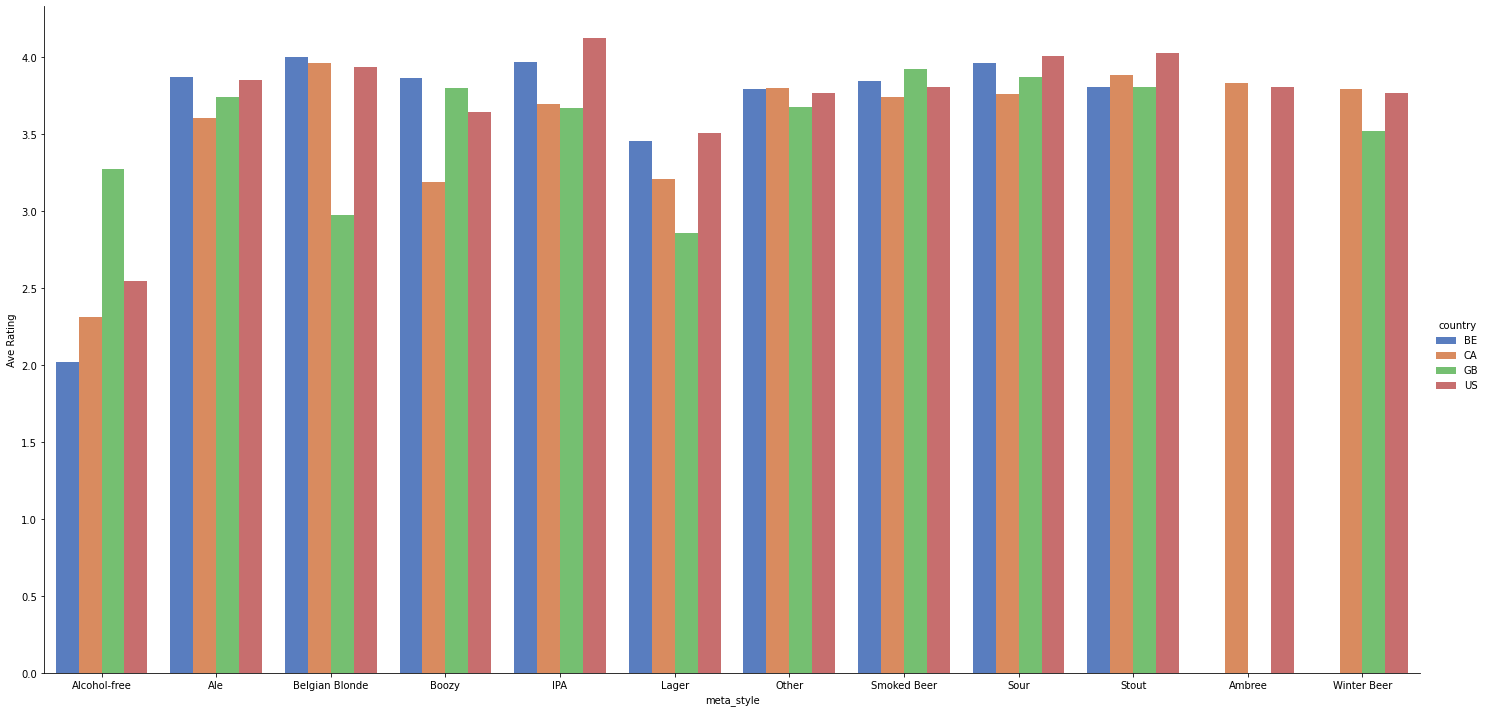

In [32]:
# display in a bar chart the average rating of each meta_style per country, only display countries with more than 100 beers

# get the average rating of each meta_style per country
meta_style_per_country = merged_aromas.groupby(['country', 'meta_style'])['Ave Rating'].mean().reset_index()

# get the number of beers per country
nb_beers_per_country = merged_aromas.groupby('country')['beer_id'].count().reset_index()

# merge the two dataframes
meta_style_per_country = meta_style_per_country.merge(nb_beers_per_country, on='country')

# keep only countries with more than 100 beers

meta_style_per_country = meta_style_per_country[meta_style_per_country['beer_id'] > 100]
# drop germany
meta_style_per_country = meta_style_per_country[meta_style_per_country['country'] != 'DE']

# remove fruit and pils
meta_style_per_country = meta_style_per_country[meta_style_per_country['meta_style'] != 'Fruit']
meta_style_per_country = meta_style_per_country[meta_style_per_country['meta_style'] != 'Pilsner']

# plot the average rating of each meta_style per country
sns.catplot(x="meta_style", y="Ave Rating", hue="country", data=meta_style_per_country, kind="bar", height=10, aspect=2, palette="muted")

### How has beer metastyle popularity changed through the years ? 

<AxesSubplot:xlabel='year', ylabel='Ave Rating'>

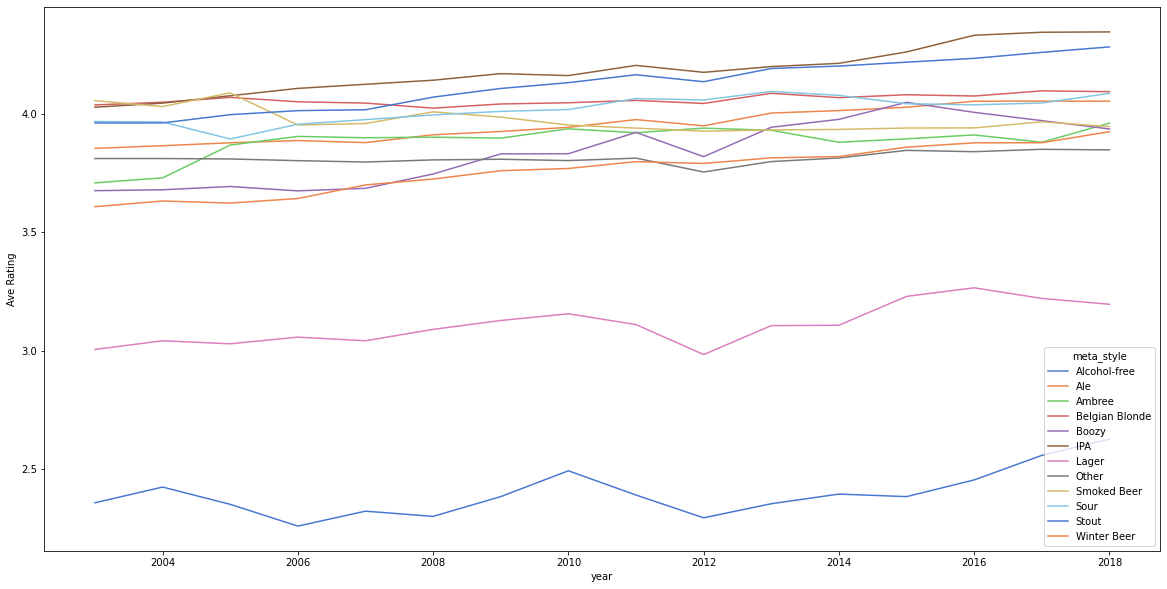

In [37]:
# Use only ratings starting from 2003
merged_reviews = merged_reviews[merged_reviews['date'] > '2003-01-01']

# Print rating evolution over time for each meta_style
merged_reviews['date'] = pd.to_datetime(merged_reviews['date'])
merged_reviews['year'] = merged_reviews['date'].dt.year.astype(int)
merged_reviews['month'] = merged_reviews['date'].dt.month.astype(int)

# get the average rating of each meta_style per year
meta_style_per_year = merged_reviews.groupby(['year', 'meta_style'])['Ave Rating'].mean().reset_index()

# plot the average rating of each meta_style per year
fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x="year", y="Ave Rating", hue="meta_style", data=meta_style_per_year, palette="muted", ax=ax)

### Are there drinking trends of some Meta styles between seasons ? 

<AxesSubplot:xlabel='month', ylabel='Rating difference'>

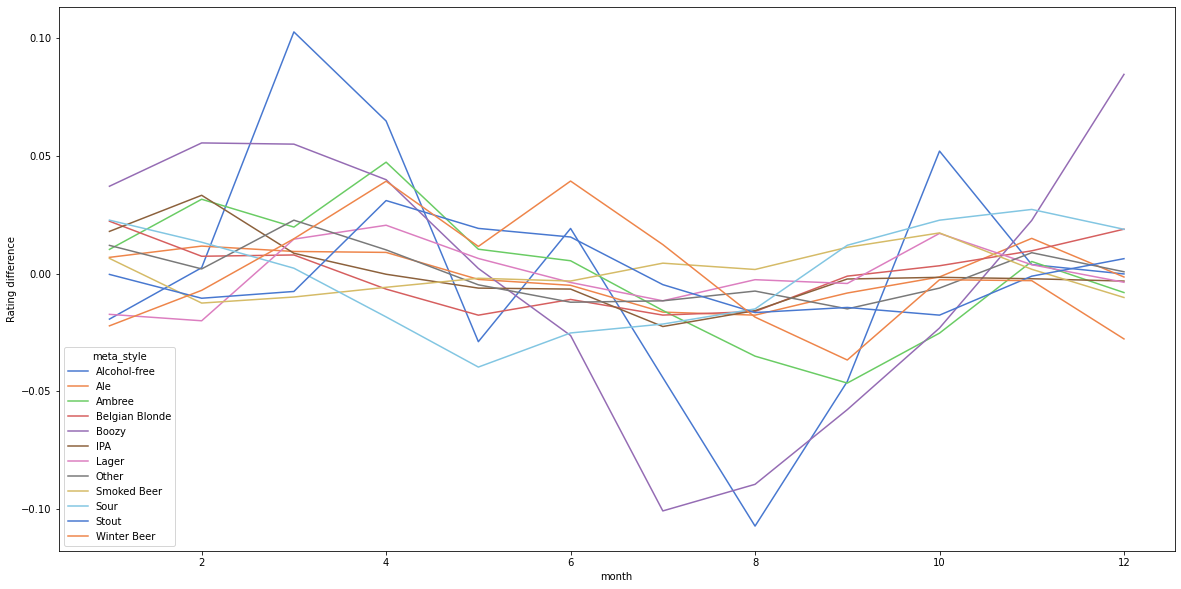

In [38]:
# get the average rating of each meta_style per year
meta_style_per_month = merged_reviews.groupby(['month', 'meta_style'])['Ave Rating'].mean().reset_index()

# plot the average rating of each meta_style per year
fig, ax = plt.subplots(figsize=(20, 10))

# for each style calculate the difference to the style mean
for meta_style in meta_style_per_month['meta_style'].unique():
    meta_style_per_month.loc[meta_style_per_month['meta_style'] == meta_style, 'Rating difference'] = meta_style_per_month.loc[meta_style_per_month['meta_style'] == meta_style, 'Ave Rating'] - meta_style_per_month.loc[meta_style_per_month['meta_style'] == meta_style, 'Ave Rating'].mean()

sns.lineplot(x="month", y="Rating difference", hue="meta_style", data=meta_style_per_month, palette="muted", ax=ax)

### Are beer alcohol contents getting stronger ?

In [43]:
meta_style_per_year = merged_reviews.groupby(['year', 'meta_style'])['ABV'].mean().reset_index()

<AxesSubplot:xlabel='year', ylabel='ABV'>

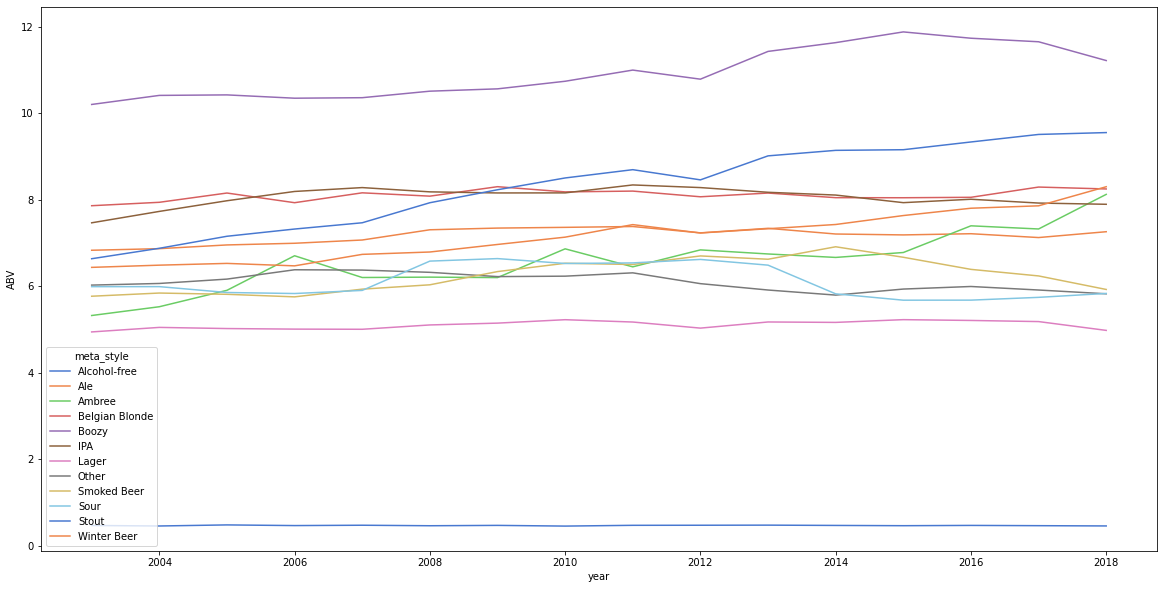

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x="year", y="ABV", hue="meta_style", data=meta_style_per_year, palette="muted", ax=ax)